In [6]:
# Basic Libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC


# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



In [2]:
# Load the dataset
df = pd.read_csv("WineQT.csv")

# Quick overview
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

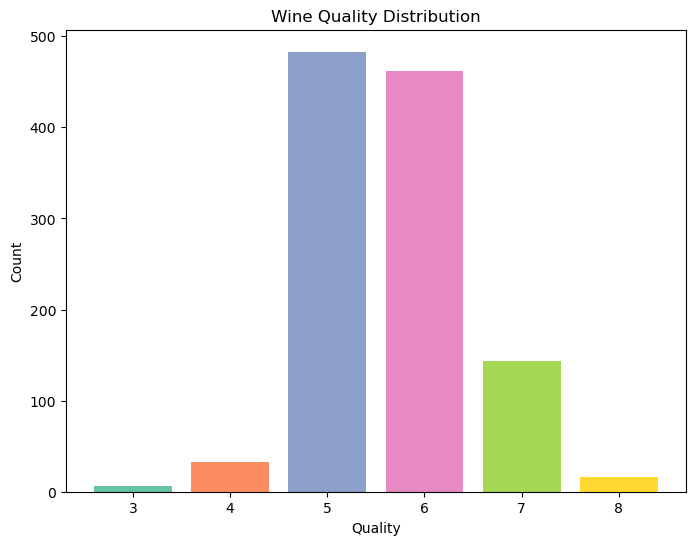

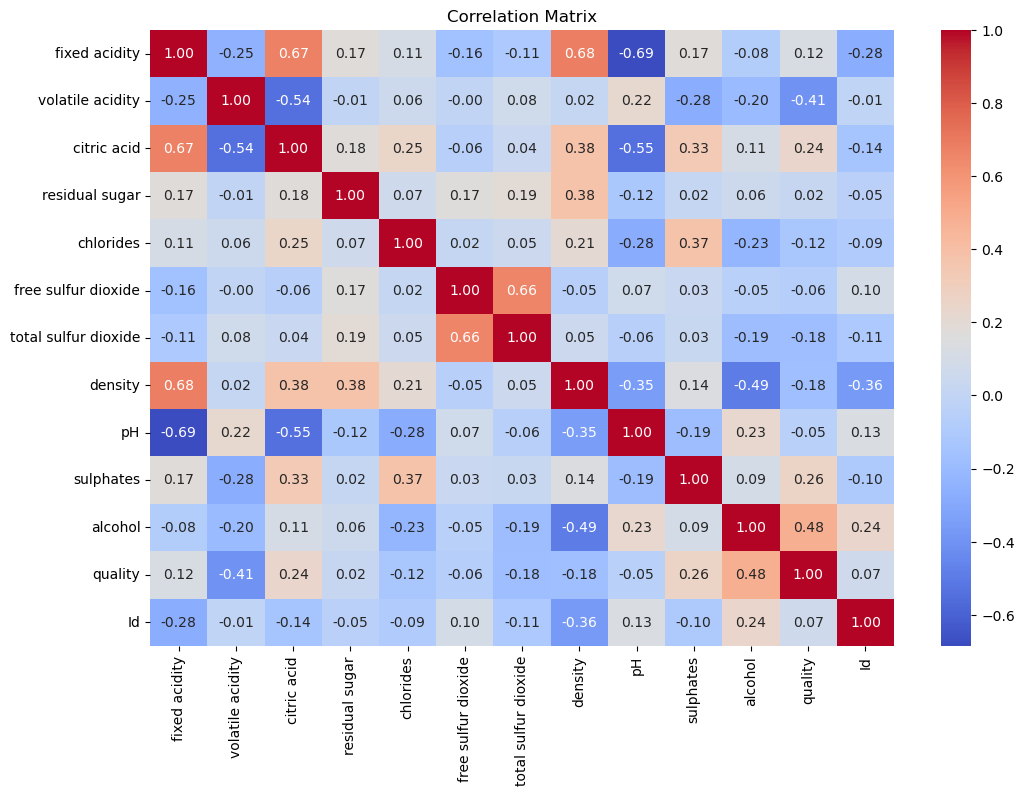

In [15]:


# Count of each quality
counts = df['quality'].value_counts().sort_index()

# Colors (one for each unique quality)
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f']  # example Set2 colors

plt.figure(figsize=(8,6))
plt.bar(counts.index, counts.values, color=colors[:len(counts)])
plt.title('Wine Quality Distribution')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()


# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()



In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)




In [43]:
# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Preprocessing steps
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


In [42]:
# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Preprocessing steps
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)
print("\nPreprocessor defined successfully!")
print(preprocessor)


Preprocessor defined successfully!
ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['fixed acidity', 'volatile acidity',
                                  'citric acid', 'residual sugar', 'chlorides',
                                  'free sulfur dioxide', 'total sulfur dioxide',
                                  'density', 'pH', 'sulphates', 'alcohol']),
                                ('cat',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 [])])


In [30]:
# Pipeline: preprocessing + Random Forest
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
rf_pipeline.fit(X_train, y_train)

# Predict on test set
y_pred = rf_pipeline.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=1))


Accuracy: 0.7117903930131004
              precision    recall  f1-score   support

           3       1.00      0.00      0.00         1
           4       1.00      0.00      0.00         7
           5       0.73      0.86      0.79        97
           6       0.69      0.72      0.70        92
           7       0.70      0.48      0.57        29
           8       1.00      0.00      0.00         3

    accuracy                           0.71       229
   macro avg       0.85      0.34      0.34       229
weighted avg       0.72      0.71      0.69       229



In [27]:
sgd_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SGDClassifier(random_state=42))
])

sgd_pipeline.fit(X_train, y_train)
y_pred_sgd = sgd_pipeline.predict(X_test)

print("SGD Accuracy:", accuracy_score(y_test, y_pred_sgd))
print(classification_report(y_test, y_pred, zero_division=1))


SGD Accuracy: 0.5764192139737991
              precision    recall  f1-score   support

           3       1.00      0.00      0.00         1
           4       1.00      0.00      0.00         7
           5       0.73      0.86      0.79        97
           6       0.69      0.72      0.70        92
           7       0.70      0.48      0.57        29
           8       1.00      0.00      0.00         3

    accuracy                           0.71       229
   macro avg       0.85      0.34      0.34       229
weighted avg       0.72      0.71      0.69       229



In [26]:
svc_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42))
])

svc_pipeline.fit(X_train, y_train)
y_pred_svc = svc_pipeline.predict(X_test)

print("SVC Accuracy:", accuracy_score(y_test, y_pred_svc))
print(classification_report(y_test, y_pred, zero_division=1))


SVC Accuracy: 0.6681222707423581
              precision    recall  f1-score   support

           3       1.00      0.00      0.00         1
           4       1.00      0.00      0.00         7
           5       0.73      0.86      0.79        97
           6       0.69      0.72      0.70        92
           7       0.70      0.48      0.57        29
           8       1.00      0.00      0.00         3

    accuracy                           0.71       229
   macro avg       0.85      0.34      0.34       229
weighted avg       0.72      0.71      0.69       229



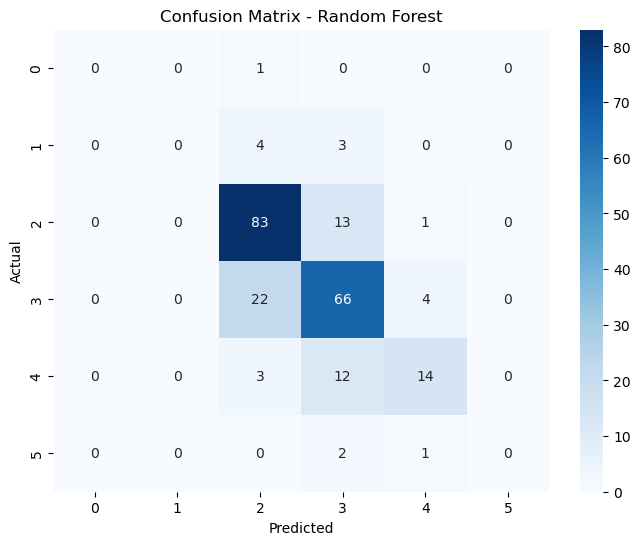

In [25]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [33]:
# ================================
# Handle class imbalance with SMOTE
# ================================
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Separate features and target
X = df.drop(['quality', 'Id'], axis=1)
y = df['quality']

# Encode categorical features if any (all are numeric here)
# SMOTE works only on numeric features
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(f"Original dataset shape: {X.shape}, {y.shape}")
print(f"Resampled dataset shape: {X_resampled.shape}, {y_resampled.shape}")

# Split into train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# =========================
# Train Random Forest Model
# =========================
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    class_weight='balanced'  # helps with imbalanced classes
)
rf.fit(X_train, y_train)

# ========================
# Evaluate the model
# ========================
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, zero_division=0))



Original dataset shape: (1143, 11), (1143,)
Resampled dataset shape: (2898, 11), (2898,)
Accuracy: 0.8362068965517241

Classification Report:

              precision    recall  f1-score   support

           3       0.95      1.00      0.97        96
           4       0.92      0.92      0.92        96
           5       0.70      0.71      0.71        97
           6       0.62      0.52      0.56        97
           7       0.85      0.88      0.86        97
           8       0.92      1.00      0.96        97

    accuracy                           0.84       580
   macro avg       0.83      0.84      0.83       580
weighted avg       0.83      0.84      0.83       580



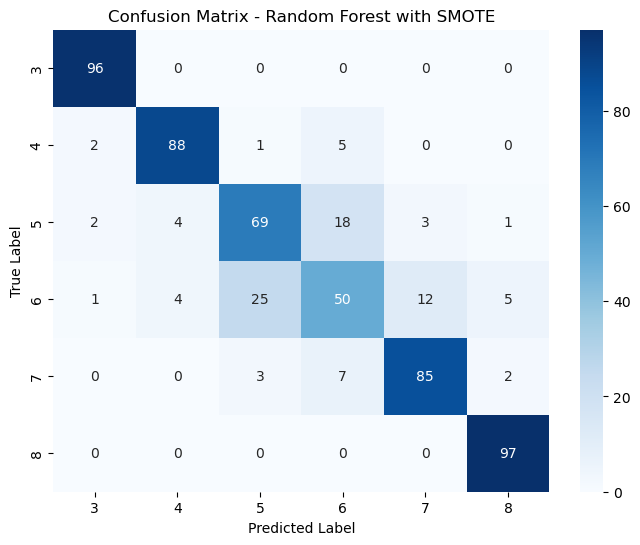

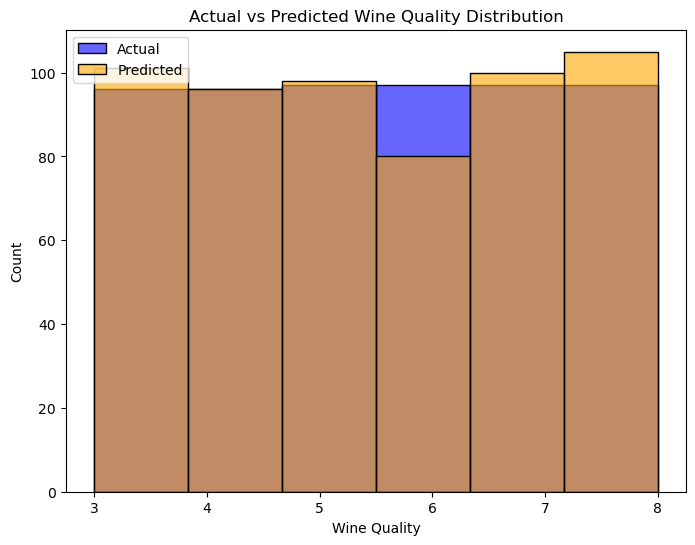

In [34]:


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y.unique()),
            yticklabels=sorted(y.unique()))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest with SMOTE")
plt.show()

# Bar plot: actual vs predicted counts
plt.figure(figsize=(8,6))
sns.histplot(y_test, color='blue', label='Actual', kde=False, bins=len(y.unique()), alpha=0.6)
sns.histplot(y_pred, color='orange', label='Predicted', kde=False, bins=len(y.unique()), alpha=0.6)
plt.legend()
plt.xlabel("Wine Quality")
plt.ylabel("Count")
plt.title("Actual vs Predicted Wine Quality Distribution")
plt.show()


In [36]:
#  Comparison: Before vs After SMOTE + Recommendations

print("=== Wine Quality Prediction Summary ===\n")

print("Before SMOTE (Imbalanced Dataset):")
print("- Accuracy ~ 71%")
print("- Classes 3, 4, and 8 had precision/recall = 0 (ignored by the model)")
print("- Macro avg f1-score ~ 0.34 → very low")
print("- Model was biased toward majority classes (quality 5 and 6)\n")

print("After SMOTE (Balanced Dataset):")
print("- Accuracy ~ 83.6% ")
print("- All classes predicted with good precision/recall")
print("   e.g. Quality 3 → Precision: 0.95, Recall: 1.0")
print("   e.g. Quality 7 → Precision: 0.85, Recall: 0.88")
print("- Macro avg f1-score ~ 0.83 → balanced performance across classes\n")

print(" Recommendations:")
print("1. Always check class imbalance and fix with SMOTE, ADASYN, or class weights")
print("2. Random Forest performed best; SGD and SVC struggled")
print("3. Use precision/recall/F1, not just accuracy, for evaluation")
print("4. Visualize confusion matrix + feature importance for deeper insights")
print("5. Next steps: Try GridSearchCV, or advanced models like XGBoost or LightGBM")


=== Wine Quality Prediction Summary ===

Before SMOTE (Imbalanced Dataset):
- Accuracy ~ 71%
- Classes 3, 4, and 8 had precision/recall = 0 (ignored by the model)
- Macro avg f1-score ~ 0.34 → very low
- Model was biased toward majority classes (quality 5 and 6)

After SMOTE (Balanced Dataset):
- Accuracy ~ 83.6% 
- All classes predicted with good precision/recall
   e.g. Quality 3 → Precision: 0.95, Recall: 1.0
   e.g. Quality 7 → Precision: 0.85, Recall: 0.88
- Macro avg f1-score ~ 0.83 → balanced performance across classes

 Recommendations:
1. Always check class imbalance and fix with SMOTE, ADASYN, or class weights
2. Random Forest performed best; SGD and SVC struggled
3. Use precision/recall/F1, not just accuracy, for evaluation
4. Visualize confusion matrix + feature importance for deeper insights
5. Next steps: Try GridSearchCV, or advanced models like XGBoost or LightGBM


In [ ]:
pip install xgboost lightgbm catboost